In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistical Analysis by Crop and Land (Simulation)

In [13]:
data_sim = pd.read_csv('simulation_results.csv')
data_opt = pd.read_csv('optimization_results.csv')

In [14]:
display(data_sim.head())
display(data_opt.head())

,day,land,crop,ph,sun,humidity,richness,compatibility
0,1,1,Potato,7.124629,5.96386,22.270758,96.296965,42.772851
1,1,1,Tomato,7.124629,5.96386,22.270758,96.296965,42.772851
2,1,1,Barley,7.124629,5.96386,22.270758,96.296965,42.772851
3,1,1,Corn,7.124629,5.96386,22.270758,96.296965,42.772851
4,1,1,Carrot,7.124629,5.96386,22.270758,96.296965,42.772851


,Land,Crop,Optimal Conditions
0,1,Potato,"(array([ 8.25671189, 11.776473 , 78.73990587,..."
1,1,Tomato,"(array([ 8.11856683, 11.33384727, 81.63707525,..."
2,1,Barley,"(array([ 8.16805613, 11.43005201, 84.23052116,..."
3,1,Corn,"(array([ 7.61013895, 9.65234493, 68.84155269,..."
4,1,Carrot,"(array([ 8.07741814, 11.10210901, 85.75050681,..."


# Descriptive Statistical Analysis by Crop and Land (Simulation)

In [15]:
crops = data_sim['crop'].unique()
lands = data_sim['land'].unique()
display(crops)
display(lands)

array(['Potato', 'Tomato', 'Barley', 'Corn', 'Carrot'], dtype=object)

array([1, 2, 3])

**GRAPH SHOWING THE COMPATIBILITY EVALUATION OF EACH CROP ACROSS EACH LAND**

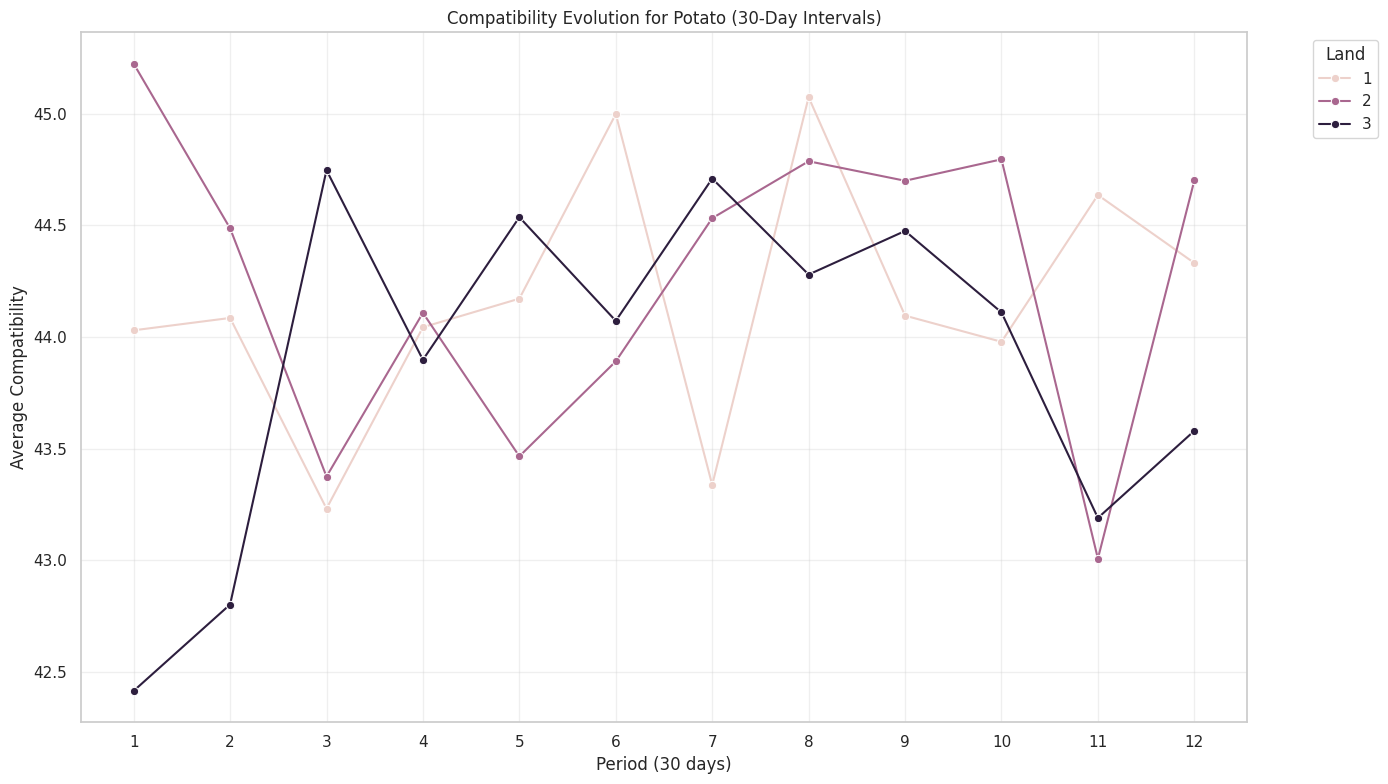

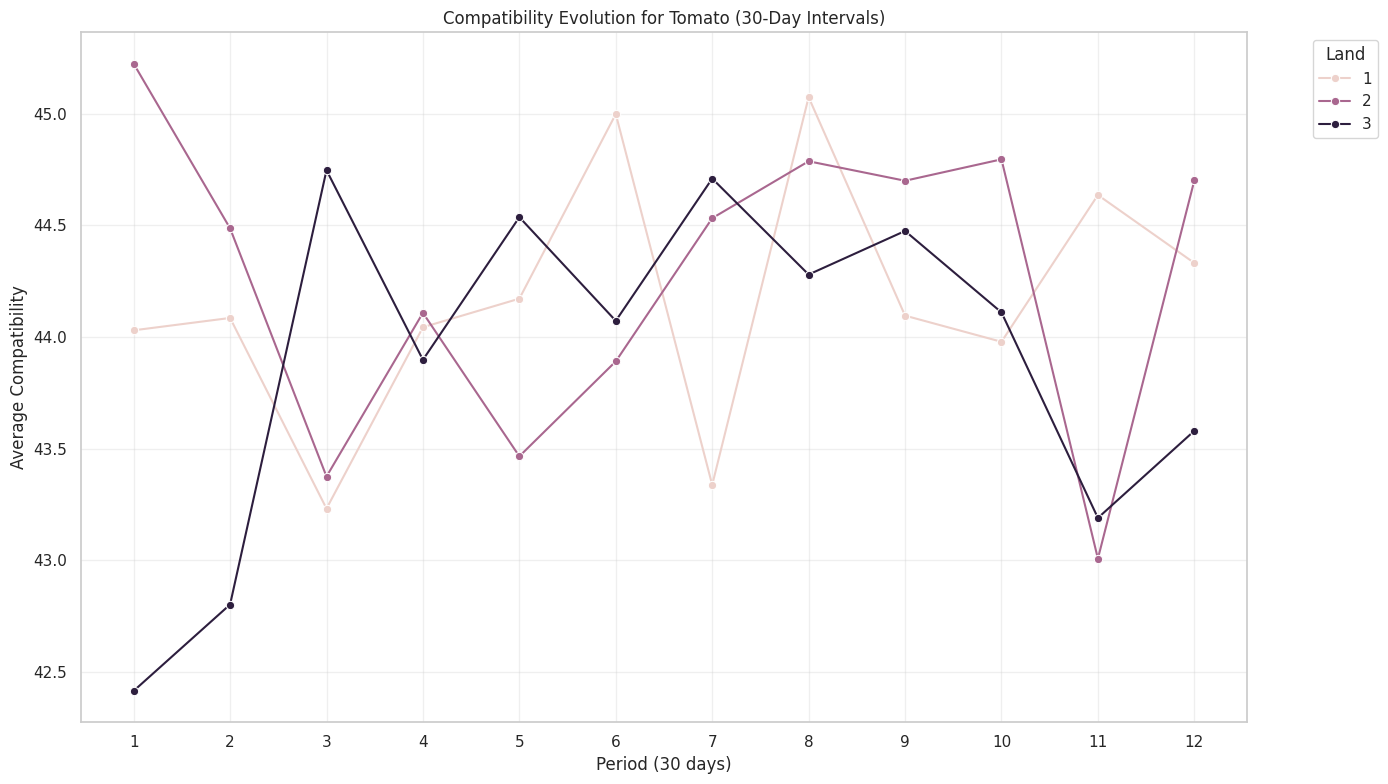

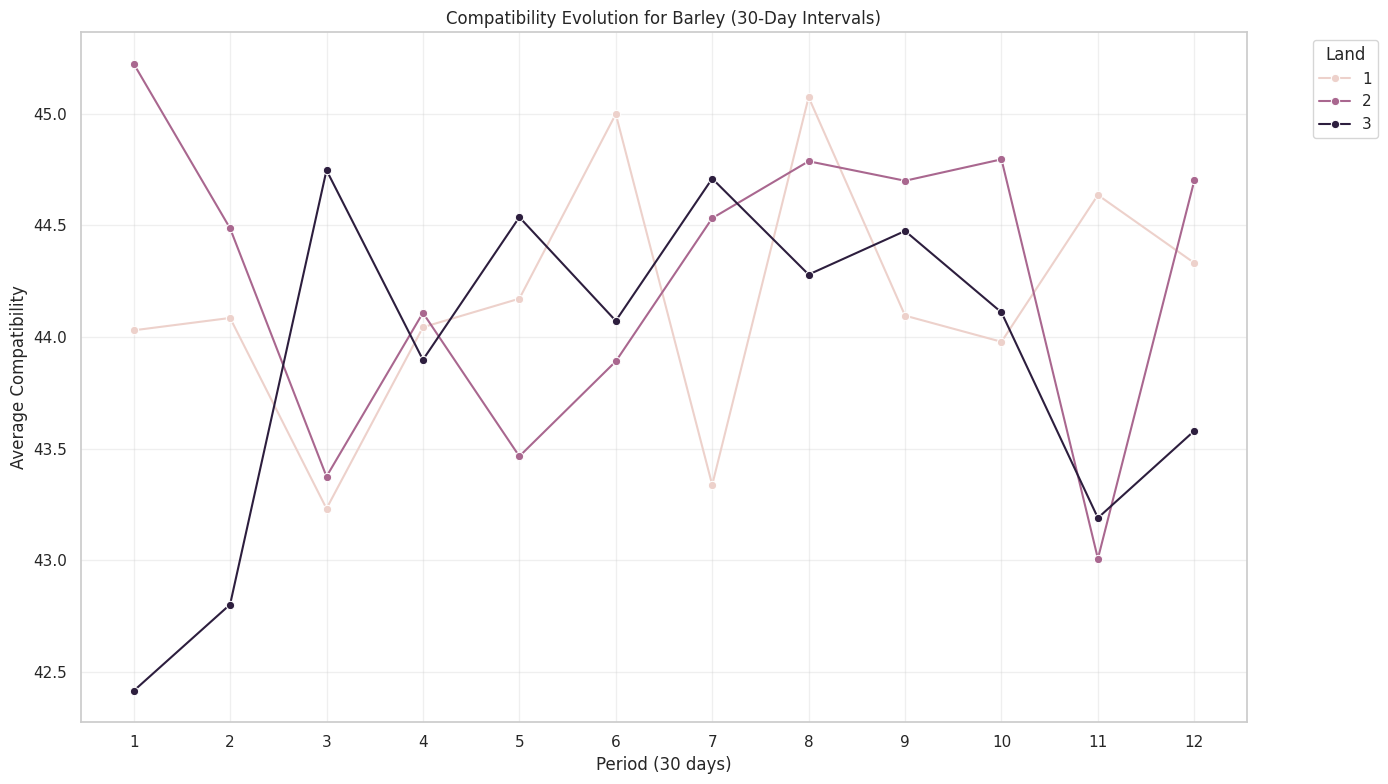

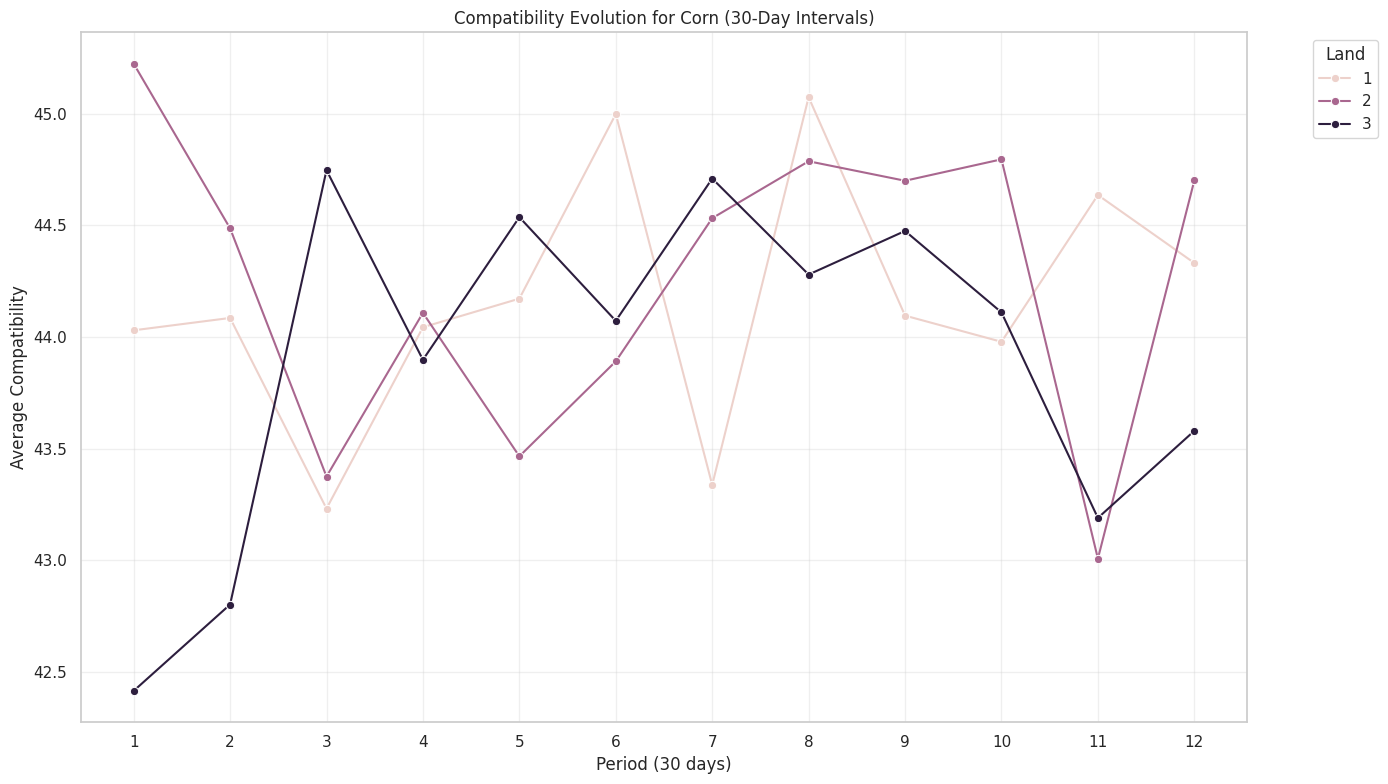

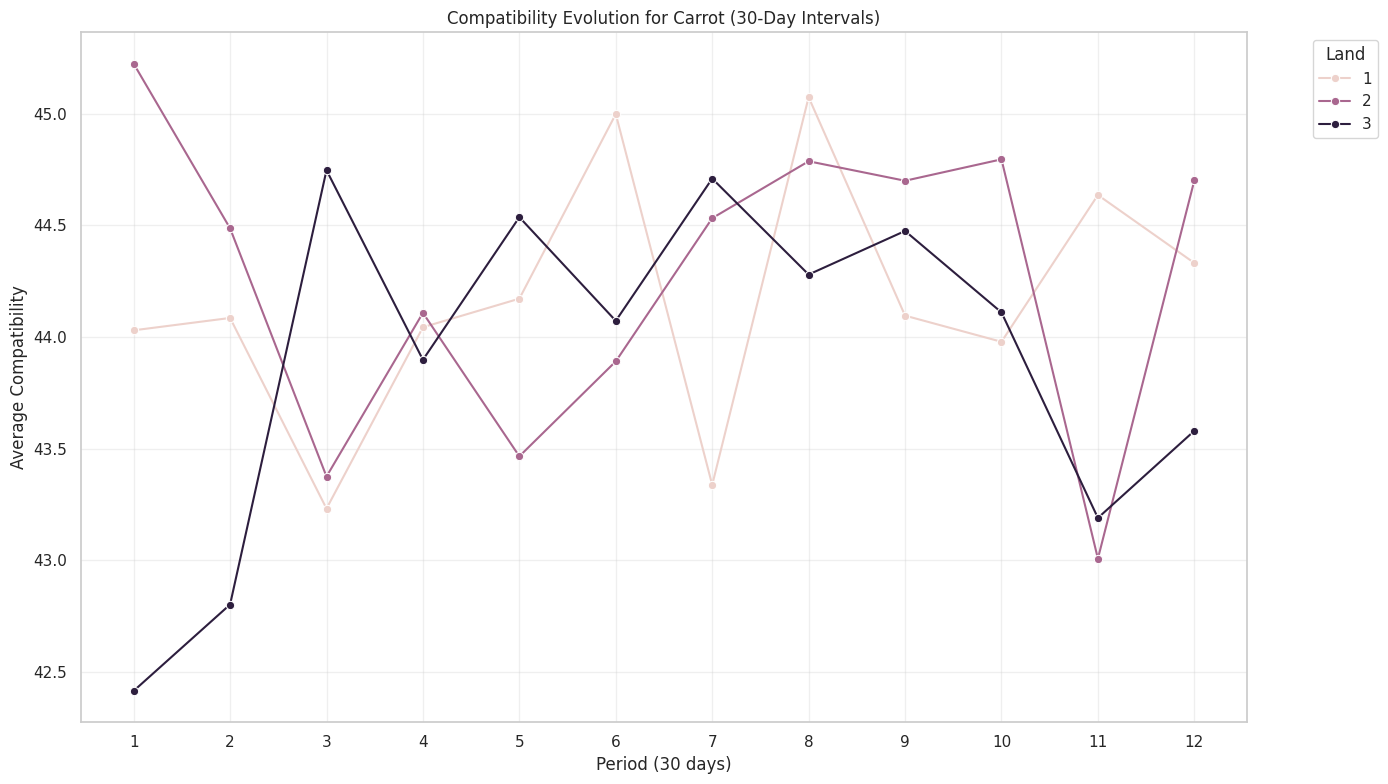

In [16]:
sns.set(style="whitegrid")

# Filter data to only consider the first 360 days
data_sim = data_sim[data_sim['day'] <= 360]

# Create a new column to identify 30-day intervals
data_sim.loc[:, 'period'] = (data_sim['day'] - 1) // 30 + 1

# Calculate average compatibility by crop, land and period
compatibility_by_period = data_sim.groupby(['crop', 'land', 'period'])['compatibility'].mean().reset_index()

# Line plot for each crop in separate graphs
for crop in crops:
    plt.figure(figsize=(14, 8))
    crop_data = compatibility_by_period[compatibility_by_period['crop'] == crop]
    sns.lineplot(x='period', y='compatibility', hue='land', data=crop_data, marker='o')
    plt.title(f'Compatibility Evolution for {crop} (30-Day Intervals)')
    plt.xlabel('Period (30 days)')
    plt.ylabel('Average Compatibility')
    plt.xticks(range(1, 13))
    plt.grid(alpha=0.3)
    plt.legend(title='Land', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**BAR GRAPH SHOWING THE AVERAGE COMPATIBILITY OF EACH CROP**

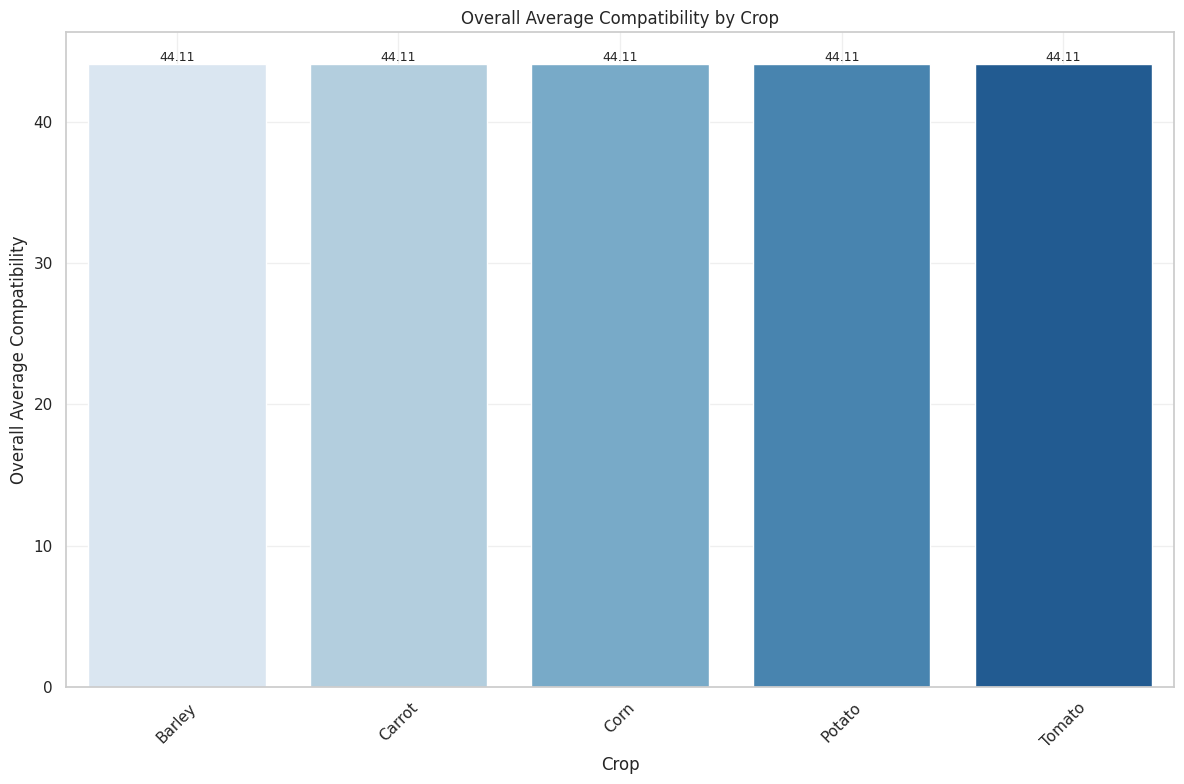

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Cálculo de la compatibilidad media general por cultivo
overall_avg_compatibility_per_crop = data_sim.groupby('crop')['compatibility'].mean().reset_index()

# Gráfico de barras - Compatibilidad Media General por Cultivo
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='crop', y='compatibility', data=overall_avg_compatibility_per_crop, hue='crop', dodge=False, palette='Blues', legend=False)

# Agregar valores encima de las barras
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=9)

plt.title('Overall Average Compatibility by Crop')
plt.xlabel('Crop')
plt.ylabel('Overall Average Compatibility')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**GRAPH SHOWING THE AVERAGE COMPATIBILITY OF EACH LAND**

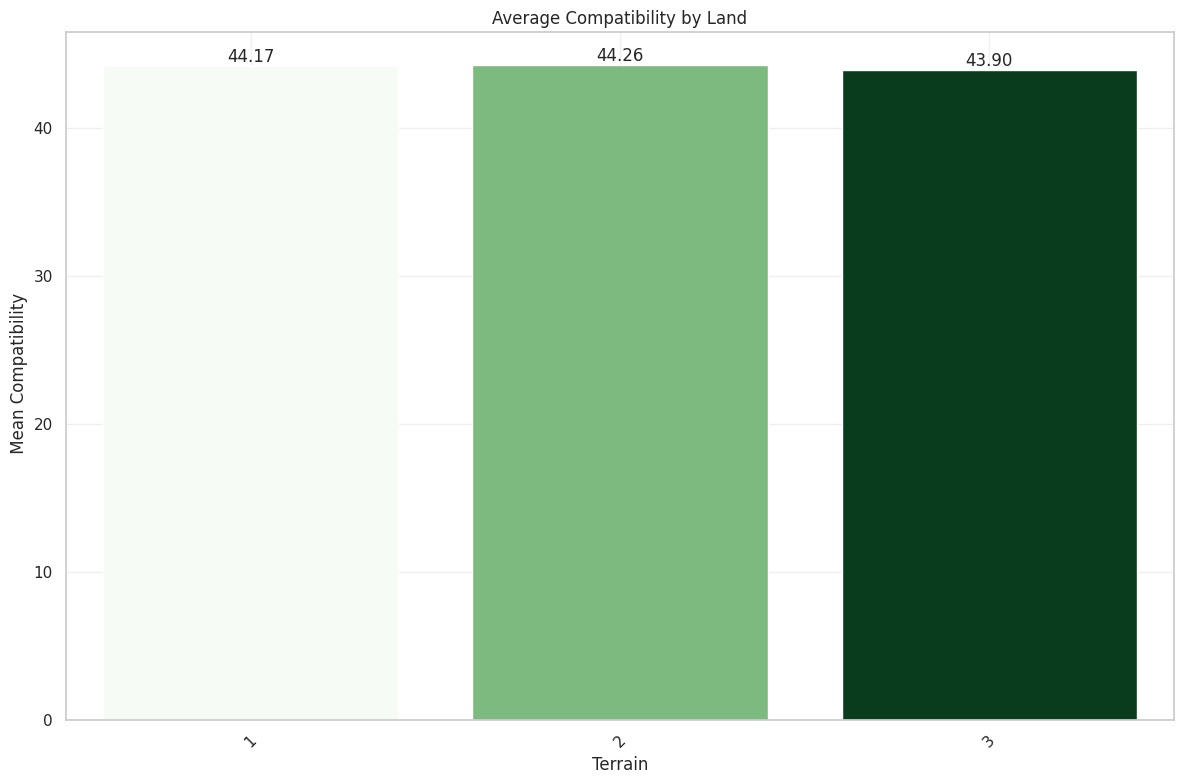

In [18]:
avg_compatibility_per_land = data_sim.groupby('land')['compatibility'].mean().reset_index()
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='land', y='compatibility', data=avg_compatibility_per_land, hue='land', dodge=False, palette='Greens', legend=False)

# Add values above the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Average Compatibility by Land')
plt.xlabel('Terrain')
plt.ylabel(' Mean Compatibility')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# PSO Optimization Graphical Analysis
Next, a visual analysis of the PSO optimization results will be performed using the data from optimization_results.csv

In [19]:
import numpy as np

def parse_optimal_conditions(conditions_str):
    conditions_str = conditions_str.replace('array', 'np.array')

    try:
        result = eval(conditions_str)

        return result[0][:3]
    except Exception as e:
        print(f"Error procesando: {conditions_str}")
        return np.array([np.nan, np.nan, np.nan])

optimal_conditions = pd.DataFrame([
    parse_optimal_conditions(str(row['Optimal Conditions']))
    for _, row in data_opt.iterrows()
], columns=['Temperature', 'Humidity', 'Light'])

data_opt_full = pd.concat([data_opt[['Land', 'Crop']], optimal_conditions], axis=1)

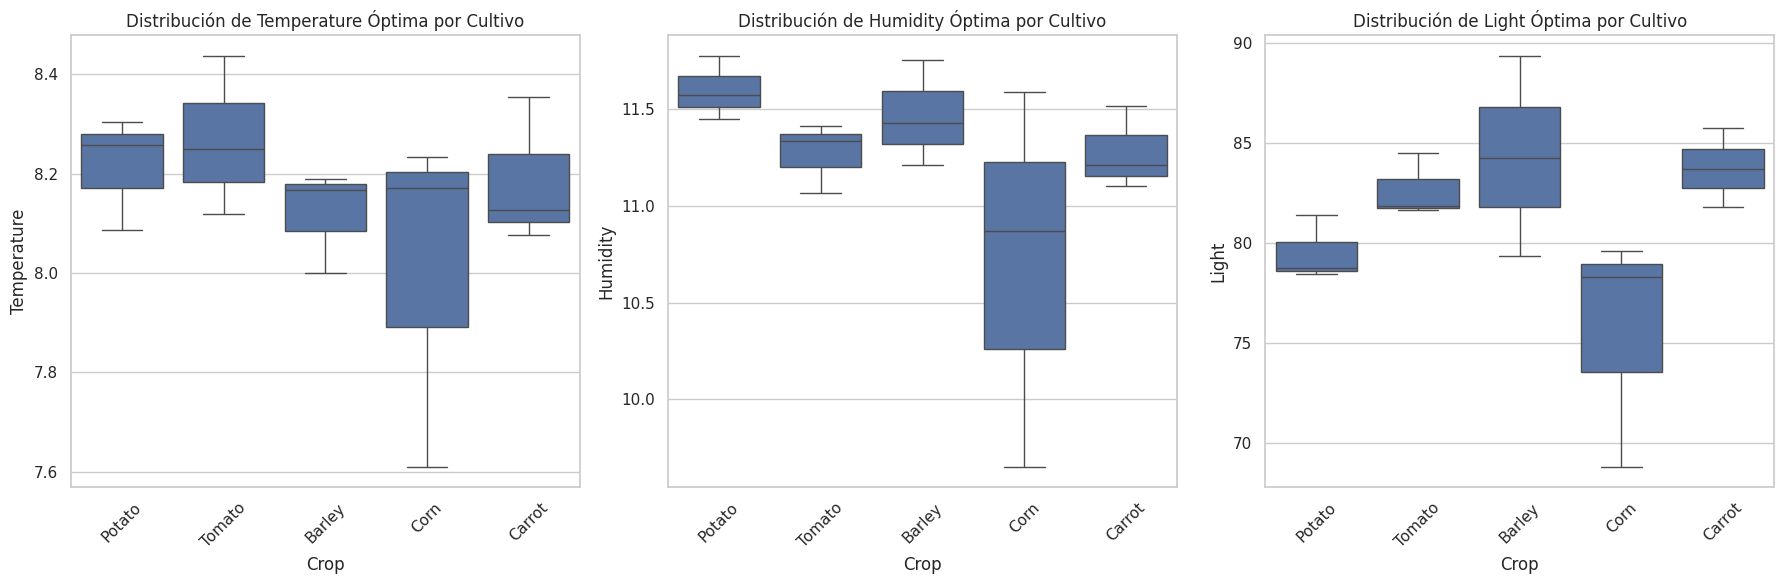

In [20]:
# Distribution plot of optimal conditions by crop
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
variables = ['Temperature', 'Humidity', 'Light']

for i, var in enumerate(variables):
    sns.boxplot(x='Crop', y=var, data=data_opt_full, ax=axes[i])
    axes[i].set_title(f'Distribución de {var} Óptima por Cultivo')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

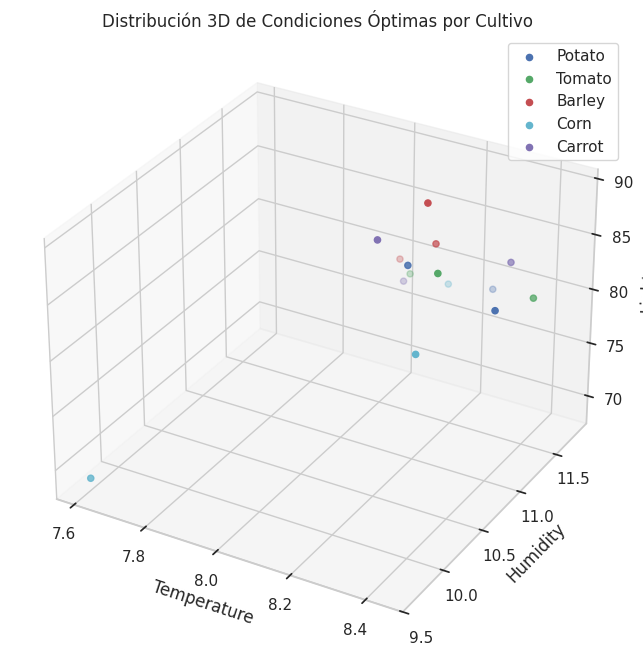

In [21]:
# Grafic distribution
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

crops = data_opt_full['Crop'].unique()
colors = ['b', 'g', 'r', 'c', 'm']

for crop, color in zip(crops, colors):
    mask = data_opt_full['Crop'] == crop
    ax.scatter(data_opt_full[mask]['Temperature'],
               data_opt_full[mask]['Humidity'],
               data_opt_full[mask]['Light'],
               c=color, label=crop)

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Light')
ax.legend()
plt.title('Distribución 3D de Condiciones Óptimas por Cultivo')
plt.show()

The graphs show:
1. Distribution of optimal conditions (temperature, humidity and light) for each crop using box plots
2. 3D visualization of the relationship between the three variables for each crop